In [1]:
import numpy as np
import torch.nn as nn

import torch
import torch.utils.data
import matplotlib.pyplot as plt
from utils import AvgrageMeter
from models.autoencoder import Autoencoder
from main import train_autoencoder, train_classifier

In [2]:
train_x = np.load('data/k49-train-imgs.npz')['arr_0']
train_y = np.load('data/k49-train-labels.npz')['arr_0']
test_x = np.load('data/k49-test-imgs.npz')['arr_0']
test_y = np.load('data/k49-test-labels.npz')['arr_0']

# Map to [-1, 1] so that we can use a tanh function
# train_x = (train_x / 127.5) - 1
# test_x = (test_x / 127.5) - 1

# Map to [0, 1] so that we can use a relu function
train_x = train_x / 255
test_x = test_x / 255

In [3]:
# Shuffle the data
ids = np.arange(len(train_x))
np.random.shuffle(ids)

# Select a subsample of the data
train_x = train_x[ids][:10000]
train_y = train_y[ids][:10000]

# Flatten the images
train_x = train_x.reshape((-1, 28 * 28))
test_x = test_x.reshape((-1, 28 * 28))

# Convert all to tensors
train_x = torch.from_numpy(train_x).type(torch.FloatTensor)
test_x = torch.from_numpy(test_x).type(torch.FloatTensor)

train_y = torch.from_numpy(train_y).type(torch.LongTensor)
test_y = torch.from_numpy(test_y).type(torch.LongTensor)

# Make datasets
train = torch.utils.data.TensorDataset(train_x, train_y)
test = torch.utils.data.TensorDataset(test_x, test_y)

In [12]:
target_size = 144

In [7]:
model, history = train_autoencoder(train, test, target_size=target_size, step_size=20, epochs_per_step=5, 
                                   learning_rate=1e-3, weight_decay=1e-4, batch_size=1024, verbose=False)

Epoch 0, latent size 784. LOSS: train 0.0784 test 0.0271.
Epoch 1, latent size 784. LOSS: train 0.0173 test 0.0114.
Epoch 2, latent size 784. LOSS: train 0.0075 test 0.0052.
Epoch 3, latent size 784. LOSS: train 0.0044 test 0.0038.
Epoch 4, latent size 764. LOSS: train 0.0052 test 0.0048.
Epoch 5, latent size 764. LOSS: train 0.0043 test 0.0042.
Epoch 6, latent size 764. LOSS: train 0.0039 test 0.0040.
Epoch 7, latent size 764. LOSS: train 0.0037 test 0.0038.
Epoch 8, latent size 764. LOSS: train 0.0035 test 0.0038.
Epoch 9, latent size 744. LOSS: train 0.0052 test 0.0051.
Epoch 10, latent size 744. LOSS: train 0.0047 test 0.0048.
Epoch 11, latent size 744. LOSS: train 0.0044 test 0.0047.
Epoch 12, latent size 744. LOSS: train 0.0043 test 0.0046.
Epoch 13, latent size 744. LOSS: train 0.0042 test 0.0045.
Epoch 14, latent size 724. LOSS: train 0.0055 test 0.0056.
Epoch 15, latent size 724. LOSS: train 0.0051 test 0.0054.
Epoch 16, latent size 724. LOSS: train 0.0049 test 0.0052.
Epoch 1

Epoch 139, latent size 224. LOSS: train 0.0174 test 0.0181.
Epoch 140, latent size 224. LOSS: train 0.0160 test 0.0173.
Epoch 141, latent size 224. LOSS: train 0.0153 test 0.0168.
Epoch 142, latent size 224. LOSS: train 0.0150 test 0.0165.
Epoch 143, latent size 224. LOSS: train 0.0148 test 0.0164.
Epoch 144, latent size 204. LOSS: train 0.0184 test 0.0191.
Epoch 145, latent size 204. LOSS: train 0.0169 test 0.0180.
Epoch 146, latent size 204. LOSS: train 0.0161 test 0.0174.
Epoch 147, latent size 204. LOSS: train 0.0156 test 0.0171.
Epoch 148, latent size 204. LOSS: train 0.0154 test 0.0170.
Epoch 149, latent size 184. LOSS: train 0.0193 test 0.0199.
Epoch 150, latent size 184. LOSS: train 0.0177 test 0.0188.
Epoch 151, latent size 184. LOSS: train 0.0168 test 0.0183.
Epoch 152, latent size 184. LOSS: train 0.0163 test 0.0179.
Epoch 153, latent size 184. LOSS: train 0.0161 test 0.0177.
Epoch 154, latent size 164. LOSS: train 0.0212 test 0.0216.
Epoch 155, latent size 164. LOSS: train 

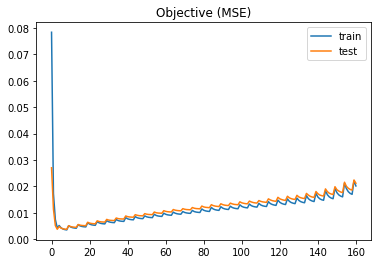

In [8]:
plt.title("Objective (MSE)")
plt.plot(history[:,0], label="train")
plt.plot(history[:,1], label="test")
plt.legend()
plt.show()

In [9]:
train_x = np.load('data/k49-train-imgs.npz')['arr_0']
train_y = np.load('data/k49-train-labels.npz')['arr_0']
test_x = np.load('data/k49-test-imgs.npz')['arr_0']
test_y = np.load('data/k49-test-labels.npz')['arr_0']

# Map to [-1, 1] so that we can use a tanh function
# train_x = (train_x / 127.5) - 1
# test_x = (test_x / 127.5) - 1

# Map to [0, 1] so that we can use a relu function
train_x = train_x / 255
test_x = test_x / 255

In [10]:
# Shuffle the data
ids = np.arange(len(train_x))
np.random.shuffle(ids)

train_x = train_x[ids]
train_y = train_y[ids]

# Flatten the images
train_x = train_x.reshape((-1, 28 * 28))
test_x = test_x.reshape((-1, 28 * 28))

# Convert all to tensors
train_x = torch.from_numpy(train_x).type(torch.FloatTensor)
test_x = torch.from_numpy(test_x).type(torch.FloatTensor)

train_y = torch.from_numpy(train_y).type(torch.LongTensor)
test_y = torch.from_numpy(test_y).type(torch.LongTensor)

In [13]:
latent_train_x = torch.zeros((len(train_x), target_size))
latent_test_x = torch.zeros((len(test_x), target_size))

for i in range(len(train_x)):
    if i % 50000 == 0:
        print(f"[{i:6} / {len(train_x)}]")
    pred = model.encoder(train_x[i])
    latent_train_x[i] = pred.data

for i in range(len(test_x)):
    pred = model.encoder(test_x[i])
    latent_test_x[i] = pred.data

[     0 / 232365]
[ 50000 / 232365]
[100000 / 232365]
[150000 / 232365]
[200000 / 232365]


In [14]:
# Make datasets
train = torch.utils.data.TensorDataset(latent_train_x, train_y)
test = torch.utils.data.TensorDataset(latent_test_x, test_y)

In [21]:
model, history = train_classifier(train, test, num_epochs=40, learning_rate=1e-4, weight_decay=1e-5, batch_size=64, verbose=False)

Epoch 0, LOSS: train 3.7264 test 3.6797. ACCURACY: train 0.2241 test 0.2609
Epoch 1, LOSS: train 3.5993 test 3.6356. ACCURACY: train 0.3413 test 0.3010
Epoch 2, LOSS: train 3.5659 test 3.6211. ACCURACY: train 0.3697 test 0.3120
Epoch 3, LOSS: train 3.5567 test 3.6133. ACCURACY: train 0.3762 test 0.3190
Epoch 4, LOSS: train 3.5417 test 3.5963. ACCURACY: train 0.3927 test 0.3396
Epoch 5, LOSS: train 3.5231 test 3.5844. ACCURACY: train 0.4130 test 0.3510
Epoch 6, LOSS: train 3.5147 test 3.5780. ACCURACY: train 0.4194 test 0.3557
Epoch 7, LOSS: train 3.5095 test 3.5728. ACCURACY: train 0.4236 test 0.3603
Epoch 8, LOSS: train 3.5056 test 3.5688. ACCURACY: train 0.4269 test 0.3641
Epoch 9, LOSS: train 3.5022 test 3.5653. ACCURACY: train 0.4299 test 0.3667
Epoch 10, LOSS: train 3.4993 test 3.5624. ACCURACY: train 0.4323 test 0.3695
Epoch 11, LOSS: train 3.4968 test 3.5604. ACCURACY: train 0.4346 test 0.3705
Epoch 12, LOSS: train 3.4945 test 3.5578. ACCURACY: train 0.4365 test 0.3732
Epoch 13,

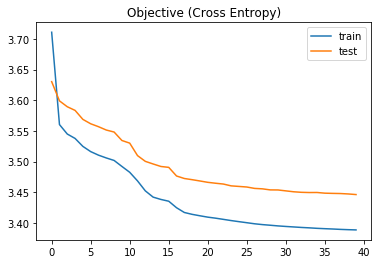

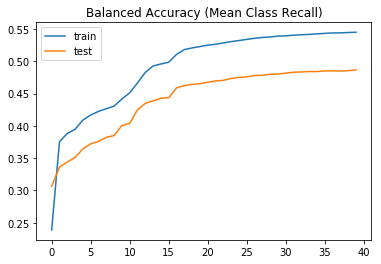

In [20]:
plt.title("Objective (Cross Entropy)")
plt.plot(history[:,0], label="train")
plt.plot(history[:,1], label="test")
plt.legend()
plt.show()

plt.title("Balanced Accuracy (Mean Class Recall)")
plt.plot(history[:,2], label="train")
plt.plot(history[:,3], label="test")
plt.legend()
plt.show()